In [1]:
#----Laptop performance ML project

In [95]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#ML library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns


In [126]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')




In [98]:
#1.Collecting the data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/laptop.csv',encoding = "ISO-8859-1")

data.head( )




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,S.NO,Brand,Processor,RAM(GB),OperatingSystem,Storage(SSD),Frequency(Hz),GraphicsCard,Display,Warranty,Price,rating
0,1,Lenovo Ideapad S145,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,100,2,Ultra,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,45000,3.9
1,2,Lenovo Ideapad S23,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256,3,BuiltIn,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,48000,4.2
2,3,HP Pentium Light lap,Intel Pentium Quad Core Processor,8,64 bit Windows 10 Operating System,256,4,Radeon RX,35.56 cm (14 inch) Display,1 Year Onsite Warranty,55000,4.6
3,4,HP 14S Core,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256,5,Radeon RX 6600 XT.,35.56 cm (14 inch) Display,1 Year Onsite Warranty,52000,3.5
4,5,HP 15s Athlon,AMD Athlon Dual Core Processor,4,64 bit Windows 10 Operating System,100,2,RX 7900 XTX,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,35000,4.1


In [5]:
# preprocesssing

In [99]:

data.head()

,S.NO,Brand,Processor,RAM(GB),OperatingSystem,Storage(SSD),Frequency(Hz),GraphicsCard,Display,Warranty,Price,rating
0,1,Lenovo Ideapad S145,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,100,2,Ultra,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,45000,3.9
1,2,Lenovo Ideapad S23,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256,3,BuiltIn,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,48000,4.2
2,3,HP Pentium Light lap,Intel Pentium Quad Core Processor,8,64 bit Windows 10 Operating System,256,4,Radeon RX,35.56 cm (14 inch) Display,1 Year Onsite Warranty,55000,4.6
3,4,HP 14S Core,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256,5,Radeon RX 6600 XT.,35.56 cm (14 inch) Display,1 Year Onsite Warranty,52000,3.5
4,5,HP 15s Athlon,AMD Athlon Dual Core Processor,4,64 bit Windows 10 Operating System,100,2,RX 7900 XTX,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,35000,4.1


In [100]:
data.drop('S.NO',axis=1,inplace=True)
data.head()

,Brand,Processor,RAM(GB),OperatingSystem,Storage(SSD),Frequency(Hz),GraphicsCard,Display,Warranty,Price,rating
0,Lenovo Ideapad S145,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,100,2,Ultra,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,45000,3.9
1,Lenovo Ideapad S23,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256,3,BuiltIn,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,48000,4.2
2,HP Pentium Light lap,Intel Pentium Quad Core Processor,8,64 bit Windows 10 Operating System,256,4,Radeon RX,35.56 cm (14 inch) Display,1 Year Onsite Warranty,55000,4.6
3,HP 14S Core,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256,5,Radeon RX 6600 XT.,35.56 cm (14 inch) Display,1 Year Onsite Warranty,52000,3.5
4,HP 15s Athlon,AMD Athlon Dual Core Processor,4,64 bit Windows 10 Operating System,100,2,RX 7900 XTX,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,35000,4.1


<Axes: xlabel='Price', ylabel='count'>

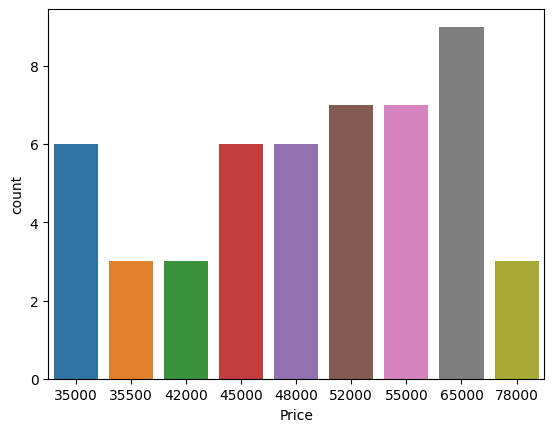

In [101]:


sns.countplot(data=data, x = 'Price', label='Count')

<Axes: xlabel='rating', ylabel='count'>

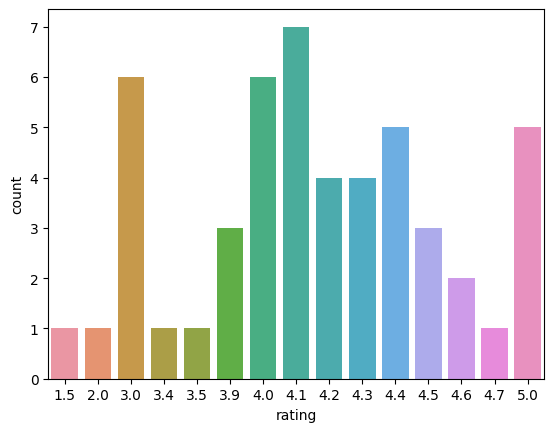

In [102]:


sns.countplot(data=data, x = 'rating', label='Count')

In [10]:
#3.Analyze the data

In [103]:
train,test=train_test_split(data,test_size=0.3)
print(train.shape)
print(test.shape)

(35, 11)
(15, 11)


In [12]:
#relevant columns

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            50 non-null     object 
 1   Processor        50 non-null     object 
 2   RAM(GB)          50 non-null     int64  
 3   OperatingSystem  50 non-null     object 
 4   Storage(SSD)     50 non-null     int64  
 5   Frequency(Hz)    50 non-null     int64  
 6   GraphicsCard     50 non-null     object 
 7   Display          50 non-null     object 
 8   Warranty         50 non-null     object 
 9   Price            50 non-null     int64  
 10  rating           50 non-null     float64
dtypes: float64(1), int64(4), object(6)
memory usage: 4.4+ KB


In [105]:
#----dataset correlation betweend data
data.corr()

<ipython-input-105-1025c07bd473>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RAM(GB),Storage(SSD),Frequency(Hz),Price,rating
RAM(GB),1.000000,-0.172253,-0.016108,0.124523,0.027350
Storage(SSD),-0.172253,1.000000,0.095714,0.169930,-0.190696
Frequency(Hz),-0.016108,0.095714,1.000000,0.295466,0.062994
Price,0.124523,0.169930,0.295466,1.000000,0.023747
rating,0.027350,-0.190696,0.062994,0.023747,1.000000


In [106]:
data.describe()

,RAM(GB),Storage(SSD),Frequency(Hz),Price,rating
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.880000,351.400000,3.820000,51370.000000,4.024000
std,1.814229,185.047705,1.452514,11808.769657,0.717297
min,4.000000,100.000000,1.000000,35000.000000,1.500000
25%,4.000000,100.000000,3.000000,45000.000000,3.925000
50%,8.000000,500.000000,4.000000,52000.000000,4.100000
75%,8.000000,512.000000,5.000000,55000.000000,4.400000
max,8.000000,512.000000,6.000000,78000.000000,5.000000


In [107]:
data.head()

,Brand,Processor,RAM(GB),OperatingSystem,Storage(SSD),Frequency(Hz),GraphicsCard,Display,Warranty,Price,rating
0,Lenovo Ideapad S145,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,100,2,Ultra,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,45000,3.9
1,Lenovo Ideapad S23,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256,3,BuiltIn,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,48000,4.2
2,HP Pentium Light lap,Intel Pentium Quad Core Processor,8,64 bit Windows 10 Operating System,256,4,Radeon RX,35.56 cm (14 inch) Display,1 Year Onsite Warranty,55000,4.6
3,HP 14S Core,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256,5,Radeon RX 6600 XT.,35.56 cm (14 inch) Display,1 Year Onsite Warranty,52000,3.5
4,HP 15s Athlon,AMD Athlon Dual Core Processor,4,64 bit Windows 10 Operating System,100,2,RX 7900 XTX,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,35000,4.1


<ipython-input-108-605afe72d6c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')


<Axes: >

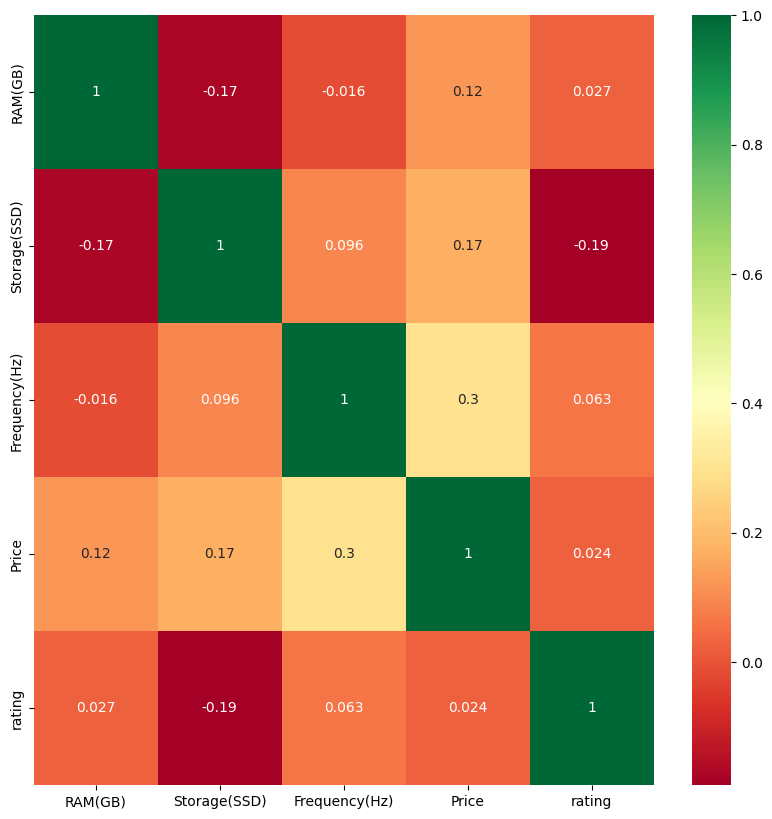

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

In [109]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
rating = lab_enc.fit_transform(data['rating'])

In [110]:
prediction_var=['Price', 'rating','RAM(GB)','Storage(SSD)','Frequency(Hz)']


In [111]:
prediction_var

['Price', 'rating', 'RAM(GB)', 'Storage(SSD)', 'Frequency(Hz)']

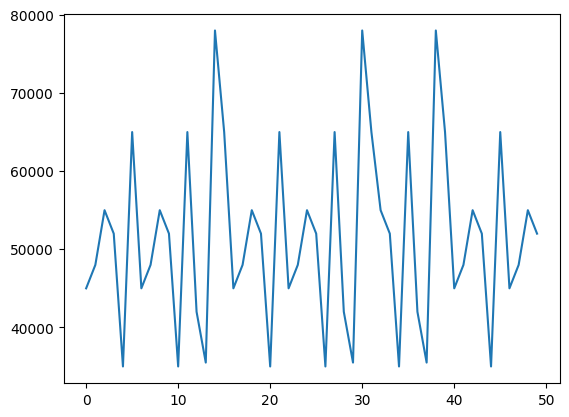

In [112]:
plt.plot(data['Price'])
plt.show()

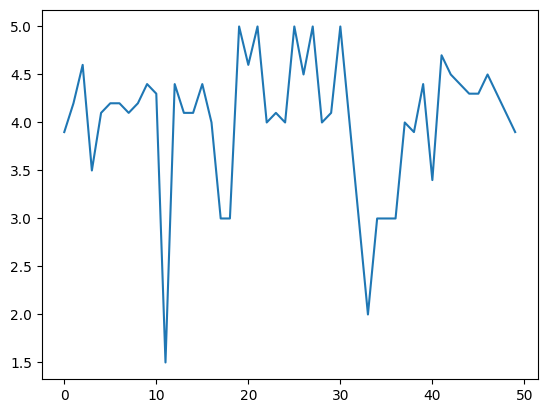

In [113]:
plt.plot(data['rating'])
plt.show()

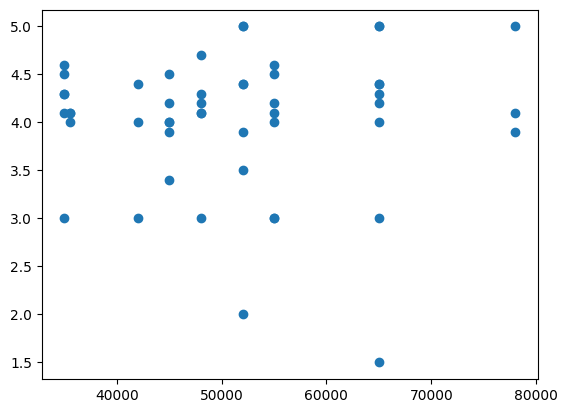

In [114]:
plt.scatter(data['Price'],data['rating'])
plt.show()

In [115]:
#---create ensemble moon split
laptop_data=data.size
X, y = make_moons(n_samples=laptop_data, noise=0.30)

In [128]:
#----Apply ensemble Voting 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [166]:
from sklearn.naive_bayes import GaussianNB
log = LogisticRegression()
rnd = DecisionTreeClassifier()
GB = BernoulliNB()



In [167]:
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('DecisionTreeClassifier', rnd), ('BernoulliNB', GB)],
    voting='hard')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('logistics_regression', LogisticRegression()),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier()),
                             ('BernoulliNB', BernoulliNB())])

In [119]:
#TRAINING DATA
#input training data for price
train_X=train[prediction_var]
#output training data
train_Y=train['Price']

In [120]:
#input training data for rating
train_X=train[prediction_var]
#output training data
train_Y1=train['rating']

In [121]:
#input training data 
train_X=train[prediction_var]
#output training data
train_Z=train['RAM(GB)']

In [122]:
#TESTING DATA
#same steps for testing data
#input testing data 
test_X=test[prediction_var]
#output testing data
test_Y=test['Frequency(Hz)']

In [123]:
#same steps for testing data
#input testing data 
test_X=test[prediction_var]


#output testing data
lab_enc = preprocessing.LabelEncoder()
rating = lab_enc.fit_transform(data['rating'])

test_Y1=test['rating']

In [124]:
#same steps for testing data 
#input testing data 
test_X=test[prediction_var]
#output testing data
test_Z=test['Price']

In [130]:
#Training the model 

logistic_model=LogisticRegression()
logistic_model.fit(train_X,train_Y)

LogisticRegression()

In [131]:
#Training the model 

logistic_model_2=LogisticRegression()


In [133]:
#Testing 

predicted_value=logistic_model.predict(test_X) 


In [134]:
#prediction the laptop  : Result
pd.DataFrame({'predicted_value':predicted_value,'KnowO/P':test_Z})

,predicted_value,KnowO/P
46,55000,45000
6,78000,45000
4,78000,35000
48,78000,55000
26,78000,35000
11,65000,65000
0,78000,45000
45,78000,65000
8,78000,55000
7,55000,48000


In [135]:
algorithms=[ DecisionTreeRegressor(),KNeighborsRegressor()]

In [136]:
#Pipeline to compare regression models quickly of KNN, DecisionTree

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))])

In [138]:
def prepare_model(algorithm, train_X, train_Y): 
    model = Pipeline(steps=[('preprocessing', num_pipeline),('algorithm', algorithm)])
    model.fit(X_train, y_train)
    return model

In [139]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [144]:
# Logistic regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        69
           1       0.83      0.84      0.83        69

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138

[[57 12]
 [11 58]]
Logistic regression accuracy is 0.8333333333333334


In [145]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Naive Bayes accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        69
           1       0.85      0.65      0.74        69

    accuracy                           0.77       138
   macro avg       0.78      0.77      0.76       138
weighted avg       0.78      0.77      0.76       138

[[61  8]
 [24 45]]
Naive Bayes accuracy is 0.7681159420289855


In [158]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Decision Tree accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        69
           1       0.74      0.81      0.77        69

    accuracy                           0.76       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.76      0.76      0.76       138

[[49 20]
 [13 56]]
Decision Tree accuracy is 0.7608695652173914


In [150]:
names = []
times = []
mses = []
maes = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    print(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_test)
    end_time = time.time()
    print(end_time - start_time)
    times.append(end_time - start_time)
    mses.append(mean_squared_error(y_test, pred))
    maes.append(mean_absolute_error(y_test, pred))

DecisionTreeRegressor
0.005253314971923828
KNeighborsRegressor
0.0051996707916259766


In [151]:
#--comparing algorithms
results_dict = {'Algorithm': names, 'MSE': mses, 'MAE': maes, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='MSE', ascending=1)

,Algorithm,MSE,MAE,Time
1,KNeighborsRegressor,0.096522,0.166667,0.005200
0,DecisionTreeRegressor,0.246377,0.246377,0.005253


In [152]:
import csv
list_student=[]
list_developer=[]
list_gamer=[]
list_basic=[]

In [153]:
with open('/content/drive/My Drive/Colab Notebooks/laptop.csv', encoding='latin-1') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
    print(reader_obj) 
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
       #----student
       if   row[3]=='4' and int(row[5])<=300 and  int(row[6])<=3 and int(row[10])<=40000:
          list_student.append(row[0])
       
       #----developer
       if     row[3]=='8' and int(row[5])>=300 and   int(row[6])>=3 and int(row[10])>=40000:
          list_developer.append(row[0])

       #---Gamer
       if     row[3]=='8' and int(row[5])>=100 and   int(row[6])>=5 and   int(row[6])>=5 and  row[7]=='FHD gaming' or  row[7]==' Radeon RX' and int(row[10])>=40000:
          list_gamer.append(row[0])

       #----Basic
       if   row[3]=='4' and int(row[5])<=100 and  int(row[6])<=2 and int(row[10])<=35000:
          list_basic.append(row[0])



In [170]:
name=input('Choose the Category (student/Gaming/Developer/Basic)')

print('---------------------------------------------------------------------')
print('LAptop Details based on  Requirements Performance:',name)
print('---------------------------------------------------------------------')
print('\n')

with open('/content/drive/My Drive/Colab Notebooks/laptop.csv', encoding='latin-1') as file_obj:
    reader_obj = csv.reader(file_obj)
    print(reader_obj) 
    for row in reader_obj:
      if name=='Student' or name=='student':
          
          if   row[0] in list_student:
            print('Laptop Model Name :  ',row[1],' ',row[2],'  RAM  :',row[3],'GB     ',row[4],' ',row[5],'GB SSD   ',' Frequeney  ',row[6],'   Price: ',row[10])

      if name=='Developer' or name=='developer':
          
          if   row[0] in list_developer:
            print('Laptop Model Name :  ',row[1],' ',row[2],'  RAM  :',row[3],'GB     ',row[4],' ',row[5],'GB SSD   ',' Frequeney  ',row[6],'   Price: ',row[10])
      
      if name=='Gaming' or name=='gaming':
          
          if   row[0] in list_gamer:
            print('Laptop Model Name :  ',row[1],' ',row[2],'  RAM  :',row[3],'GB     ',row[4],' ',row[5],'GB SSD   ',' Frequeney  ',row[6],'   Price: ',row[10])
     
      if name=='Basic' or name=='basic':
          
          if   row[0] in list_basic:
            print('Laptop Model Name :  ',row[1],' ',row[2],'  RAM  :',row[3],'GB     ',row[4],' ',row[5],'GB SSD   ',' Frequeney  ',row[6],'   Price: ',row[10])



Choose the Category (student/Gaming/Developer/Basic)student
---------------------------------------------------------------------
LAptop Details based on  Requirements Performance: student
---------------------------------------------------------------------


Laptop Model Name :   HP 15s Athlon    AMD Athlon Dual Core Processor   RAM  : 4 GB      64 bit Windows 10 Operating System   100 GB SSD     Frequeney   2    Price:  35000
Laptop Model Name :   Lenovo IdeaPad Core M31   Intel Core i3 Processor (10th Gen)   RAM  : 4 GB      64 bit Windows 10 Operating System   256 GB SSD     Frequeney   1    Price:  35500


In [175]:
#-------------Comparision of Accuracy levels
for clf in (log,  GB, rnd):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8333333333333334
BernoulliNB 0.7681159420289855
DecisionTreeClassifier 0.7608695652173914


In [80]:
print('Conclusion: Logistic Regression algorithm is finalized as best prediction algorithm univresally best for prediction')

Conclusion: Logistic Regression algorithm is finalized as best prediction algorithm univresally best for prediction
